### 1. Implement iterative and full recursive version of following sorting techniques and repeat the experiment for larger values of n with different input patterns and plot the comparison graph of number of elements versus execution time taken. The elements can be read from a file or can be generated using random number generator.

-  a) Selection sort

-   b) Insertion sort

-   c) Bubble sort

Imports

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time


Array Generator (For 10, 100, 200, 500, 1000, 10000 elements):

In [2]:
def Rand(start, end, num):
    res =[]
    for j in range(num):
        res.append(random.randint(start,end))
    return res

arr10 = Rand(0,10,10)
arr100 = Rand(0,1000,100)
arr200 = Rand(0,500,200)
arr500 = Rand(0,1000,500)
arr1000 = Rand(11,10000,1000)





Funtion to measure execution time:


In [3]:
def measure_execution_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr.copy())
    end_time = time.time()
    return end_time - start_time


### 1: Selection Sort:

- a> Iterative Version

In [4]:
def selection_sort(arr):
    for i in range(0,len(arr)-1):
        curr_minimum_idx = i
        for j in range(i+1,len(arr)):
            if (arr[j] < arr[curr_minimum_idx]):
                curr_minimum_idx = j
        arr[i], arr[curr_minimum_idx] = arr[curr_minimum_idx],arr[i]
    return arr


In [5]:
print(selection_sort(arr10))


[0, 0, 0, 1, 1, 2, 4, 4, 6, 9]


- b> Recursive Version

In [6]:
def recursive_selection_sort(arr, n=None, index=0):
    if n is None:
        n = len(arr)
    if index == n:
        return
    min_index = index
    for j in range(index + 1, n):
        if arr[j] < arr[min_index]:
            min_index = j

    arr[index], arr[min_index] = arr[min_index], arr[index]
    recursive_selection_sort(arr, n, index + 1)
    return arr


In [7]:
print(recursive_selection_sort(arr10))

[0, 0, 0, 1, 1, 2, 4, 4, 6, 9]


### 2. Insertion Sort:

- a> Iterative version: 

In [8]:
def insertion_sort(arr):
    for i in range(1,len(arr)):
        j = i
        while( arr[j-1] > arr[j]) and (j>0):
            arr[j-1],arr[j] = arr[j],arr[j-1]
            j -= 1
    return arr 


In [9]:
print(insertion_sort(arr10))

[0, 0, 0, 1, 1, 2, 4, 4, 6, 9]


- b> Recursive Version

In [10]:
def recursive_insertion_sort(arr, n=None):
    if n is None:
        n = len(arr)
    if n <= 1:
        return arr
    recursive_insertion_sort(arr, n - 1)
    last = arr[n - 1]
    j = n - 2
    while j >= 0 and arr[j] > last:
        arr[j + 1] = arr[j]
        j -= 1
        
    arr[j + 1] = last
    return arr


In [11]:
print(recursive_insertion_sort(arr10))

[0, 0, 0, 1, 1, 2, 4, 4, 6, 9]


### 3. Bubble Sort

- a> Iterative Version

In [12]:
def iterative_bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0,n-i-1):
            if arr[j] > arr[j+1]:
                arr[j],arr[j+1] = arr[j+1],arr[j]
                swapped = True
        if (swapped == False):
            break
    return arr


In [13]:
print(iterative_bubble_sort(arr10))

[0, 0, 0, 1, 1, 2, 4, 4, 6, 9]


- b> Recursive 

In [14]:
def recursive_bubble_sort(arr,n):
    if n ==1:
        return
    for i in range(n-1):
        if arr[i] > arr[i+1]:
            arr[i],arr[i+1] = arr[i+1],arr[i]
    recursive_bubble_sort(arr,n-1)


In [15]:
arr_2 = arr10.copy()
recursive_bubble_sort(arr_2,len(arr_2))
print(arr_2)


[0, 0, 0, 1, 1, 2, 4, 4, 6, 9]


### 2. Given an array of integers nums, sort the array in ascending order and return it. You must solve the problem without using any built-in functions in O(nlog(n)) time complexity and with the smallest space complexity possible.

Sorting functions with O(nlog(n)) complexity are merge sort and quick sort (I am going to implement Quick Sort)

In [16]:
#function that considers last elements as pivot
def partition(a,start,end):
    i = start-1
    pivot = a[end] #pivot element
    for j in range(start,end):
        if(a[j]<=pivot):
            i = i+1
            a[i],a[j] = a[j],a[i]
    a[i+1],a[end] = a[end],a[i+1]
    return i+1


#function to implement quick sort
def quick(a,start,end):
    if (start<end):
        p = partition(a,start,end)
        quick(a,start,p-1)
        quick(a,p+1,end)


def printArr(a):
    for i in range(len(a)):
        print(a[i],end=" ")



In [17]:
print("Before")
printArr(arr10)
print("\nAfter")
quick(arr10,0,len(arr10)-1)
printArr(arr10)

Before
0 0 0 1 1 2 4 4 6 9 
After
0 0 0 1 1 2 4 4 6 9 

- Selection sort: O(n^2) in all cases
- Insertion sort: O(n) = best case, O(n^2) in average/worst cases
- Bubble Sort: O(n) = best case, O(n^2) in average/worst cases
- Quick Sort: O(nlog(n)) = Best Casse, O(n^2) in worst case.

### Plots

In [18]:
size = np.array([10,100,200,500,1000])

Selection Sort Iterative Version vs Recursive: 

In [19]:
ti10 = measure_execution_time(selection_sort,arr10)
ti100 = measure_execution_time(selection_sort,arr100)
ti200 = measure_execution_time(selection_sort,arr200)
ti500 = measure_execution_time(selection_sort,arr500)
ti1000 = measure_execution_time(selection_sort,arr1000)
ti = np.array([ti10,ti100,ti200,ti500,ti1000])
tr10 = measure_execution_time(recursive_selection_sort,arr10)
tr100 = measure_execution_time(recursive_selection_sort,arr100)
tr200 = measure_execution_time(recursive_selection_sort,arr200)
tr500 = measure_execution_time(recursive_selection_sort,arr500)
tr1000 = measure_execution_time(recursive_selection_sort,arr1000)
tr = np.array([tr10,tr100,tr200,tr500,tr1000])


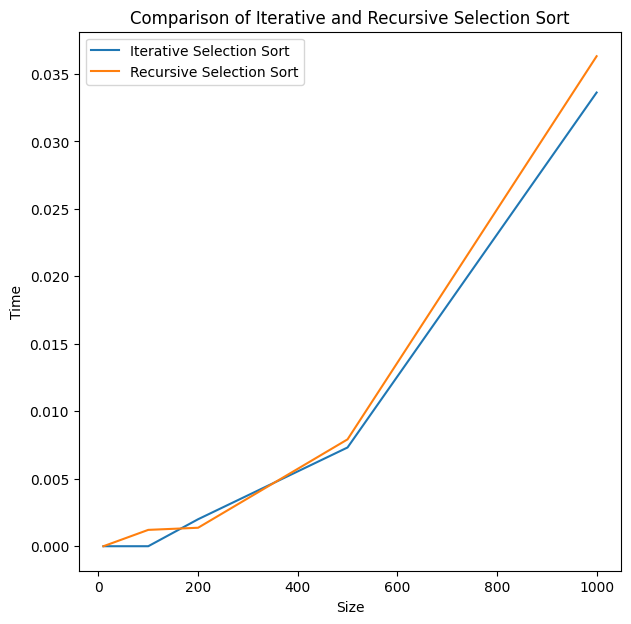

In [20]:
# Plots
plt.figure(figsize=(7,7))
plt.plot(size, ti, label='Iterative Selection Sort')
plt.plot(size, tr, label='Recursive Selection Sort')
plt.title("Comparison of Iterative and Recursive Selection Sort")
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend() 
plt.show()


Insertion sort (Iterative vs Recursive):

In [21]:
tii10 = measure_execution_time(insertion_sort,arr10)
tii100 = measure_execution_time(insertion_sort,arr100)
tii200 = measure_execution_time(insertion_sort,arr200)
tii500 = measure_execution_time(insertion_sort,arr500)
tii1000 = measure_execution_time(insertion_sort,arr1000)
tii = np.array([tii10,tii100,tii200,tii500,tii1000])
tir10 = measure_execution_time(recursive_insertion_sort,arr10)
tir100 = measure_execution_time(recursive_insertion_sort,arr100)
tir200 = measure_execution_time(recursive_insertion_sort,arr200)
tir500 = measure_execution_time(recursive_insertion_sort,arr500)
tir1000 = measure_execution_time(recursive_insertion_sort,arr1000)
tir = np.array([tir10,tir100,tir200,tir500,tir1000])


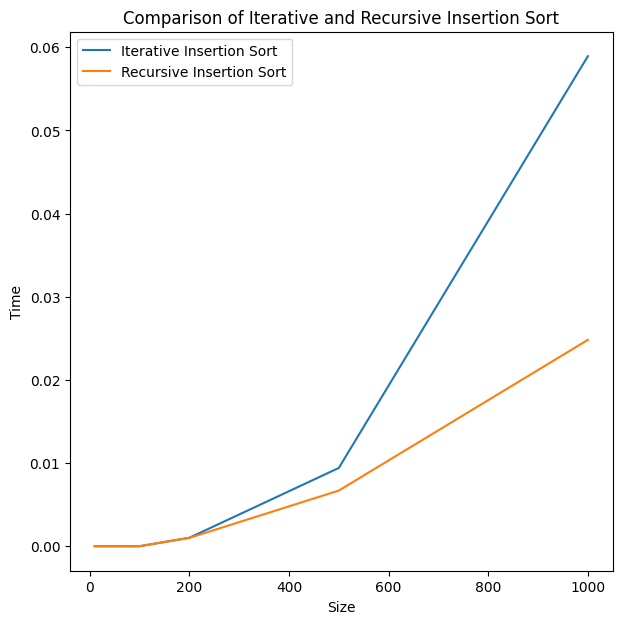

In [22]:
# Plots
plt.figure(figsize=(7,7))
plt.plot(size, tii, label='Iterative Insertion Sort')
plt.plot(size, tir, label='Recursive Insertion Sort')
plt.title("Comparison of Iterative and Recursive Insertion Sort")
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend() 
plt.show()


Bubble sort: (Iterative vs Recursive)

In [23]:
tbi10 = measure_execution_time(selection_sort,arr10)
tbi100 = measure_execution_time(selection_sort,arr100)
tbi200 = measure_execution_time(selection_sort,arr200)
tbi500 = measure_execution_time(selection_sort,arr500)
tbi1000 = measure_execution_time(selection_sort,arr1000)
tbi = np.array([tbi10,tbi100,tbi200,tbi500,tbi1000])
tbr10 = measure_execution_time(recursive_selection_sort,arr10)
tbr100 = measure_execution_time(recursive_selection_sort,arr100)
tbr200 = measure_execution_time(recursive_selection_sort,arr200)
tbr500 = measure_execution_time(recursive_selection_sort,arr500)
tbr1000 = measure_execution_time(recursive_selection_sort,arr1000)
tbr = np.array([tbr10,tbr100,tbr200,tbr500,tbr1000])


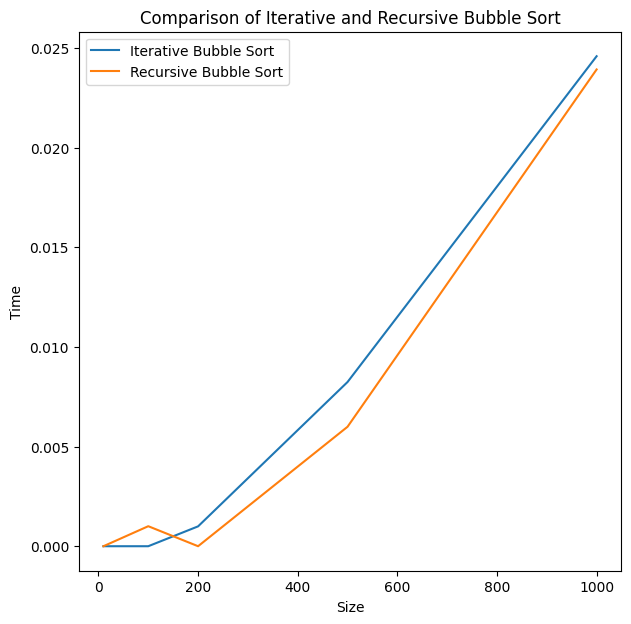

In [24]:
# Plots
plt.figure(figsize=(7,7))
plt.plot(size, tbi, label='Iterative Bubble Sort')
plt.plot(size, tbr, label='Recursive Bubble Sort')
plt.title("Comparison of Iterative and Recursive Bubble Sort")
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend() 
plt.show()


Comparing all three sorting techniques for iterative versions:

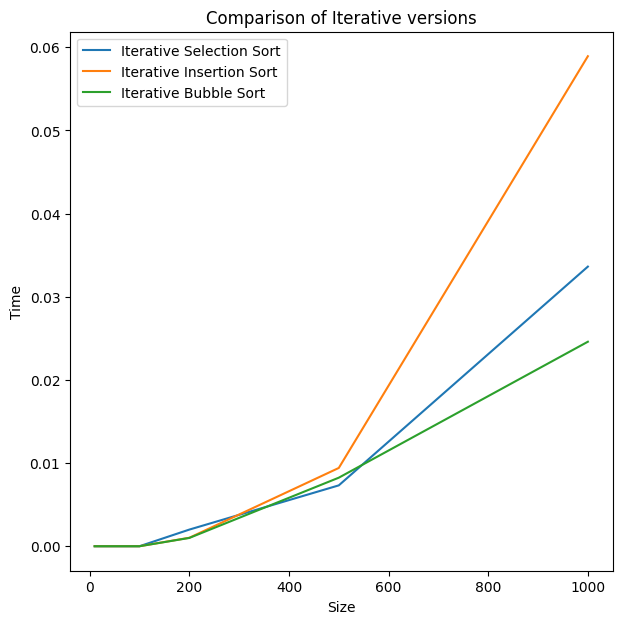

In [25]:
# Plots
plt.figure(figsize=(7,7))
plt.plot(size, ti, label='Iterative Selection Sort')
plt.plot(size, tii, label='Iterative Insertion Sort')
plt.plot(size, tbi, label='Iterative Bubble Sort')
plt.title("Comparison of Iterative versions")
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend() 
plt.show()


Comparing all three sorting techniques for recursive versions:

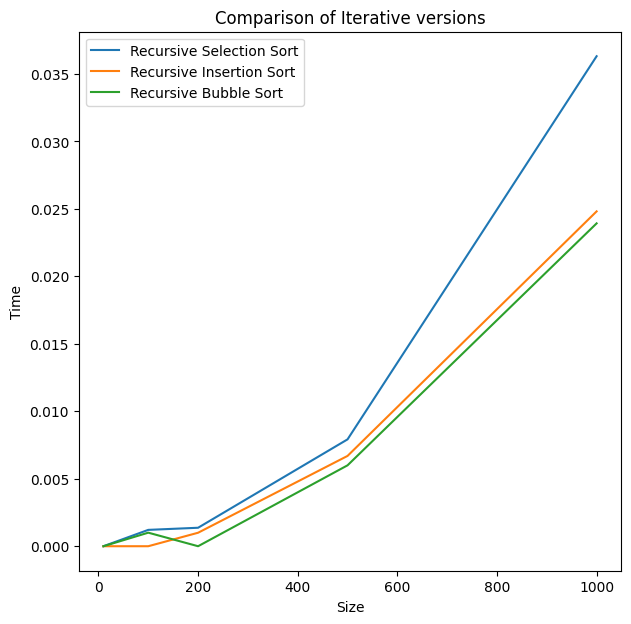

In [26]:
# Plots
plt.figure(figsize=(7,7))
plt.plot(size, tr, label='Recursive Selection Sort')
plt.plot(size, tir, label='Recursive Insertion Sort')
plt.plot(size, tbr, label='Recursive Bubble Sort')
plt.title("Comparison of Iterative versions")
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend() 
plt.show()
